# CA 2 - KARINA FRANCIELI SCHMIDT - 2023314

David McQuaid

Dr. Muhammad Iqbal




In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

np.set_printoptions(precision = 4)
sns.set() # all visualisations have things all seaborn uses 

from sklearn.preprocessing import LabelEncoder 
from sklearn.tree import DecisionTreeClassifier 
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

In [3]:
df = pd.read_csv('NHANES_age_prediction.csv')

In [4]:
df.head()

,SEQN,age_group,RIDAGEYR,RIAGENDR,PAQ605,BMXBMI,LBXGLU,DIQ010,LBXGLT,LBXIN
0,73564.0,Adult,61.0,2.0,2.0,35.7,110.0,2.0,150.0,14.91
1,73568.0,Adult,26.0,2.0,2.0,20.3,89.0,2.0,80.0,3.85
2,73576.0,Adult,16.0,1.0,2.0,23.2,89.0,2.0,68.0,6.14
3,73577.0,Adult,32.0,1.0,2.0,28.9,104.0,2.0,84.0,16.15
4,73580.0,Adult,38.0,2.0,1.0,35.9,103.0,2.0,81.0,10.92


In [5]:
df.shape

(2278, 10)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2278 entries, 0 to 2277
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   SEQN       2278 non-null   float64
 1   age_group  2278 non-null   object 
 2   RIDAGEYR   2278 non-null   float64
 3   RIAGENDR   2278 non-null   float64
 4   PAQ605     2278 non-null   float64
 5   BMXBMI     2278 non-null   float64
 6   LBXGLU     2278 non-null   float64
 7   DIQ010     2278 non-null   float64
 8   LBXGLT     2278 non-null   float64
 9   LBXIN      2278 non-null   float64
dtypes: float64(9), object(1)
memory usage: 178.1+ KB


In [20]:
# Check missing value


missing_value_formats = ["n.a.","?","NA","n/a", "na", "--"]
df = pd.read_csv("NHANES_age_prediction.csv", na_values = missing_value_formats)

def make_int(i):
    try:
        return int(i)
    except:
        return pd.np.nan

In [21]:
df.head()

,SEQN,age_group,RIDAGEYR,RIAGENDR,PAQ605,BMXBMI,LBXGLU,DIQ010,LBXGLT,LBXIN
0,73564.0,Adult,61.0,2.0,2.0,35.7,110.0,2.0,150.0,14.91
1,73568.0,Adult,26.0,2.0,2.0,20.3,89.0,2.0,80.0,3.85
2,73576.0,Adult,16.0,1.0,2.0,23.2,89.0,2.0,68.0,6.14
3,73577.0,Adult,32.0,1.0,2.0,28.9,104.0,2.0,84.0,16.15
4,73580.0,Adult,38.0,2.0,1.0,35.9,103.0,2.0,81.0,10.92


In [ ]:
#Check missing value with graph
import warnings
warnings.filterwarnings('ignore')

In [22]:
import missingno as msno

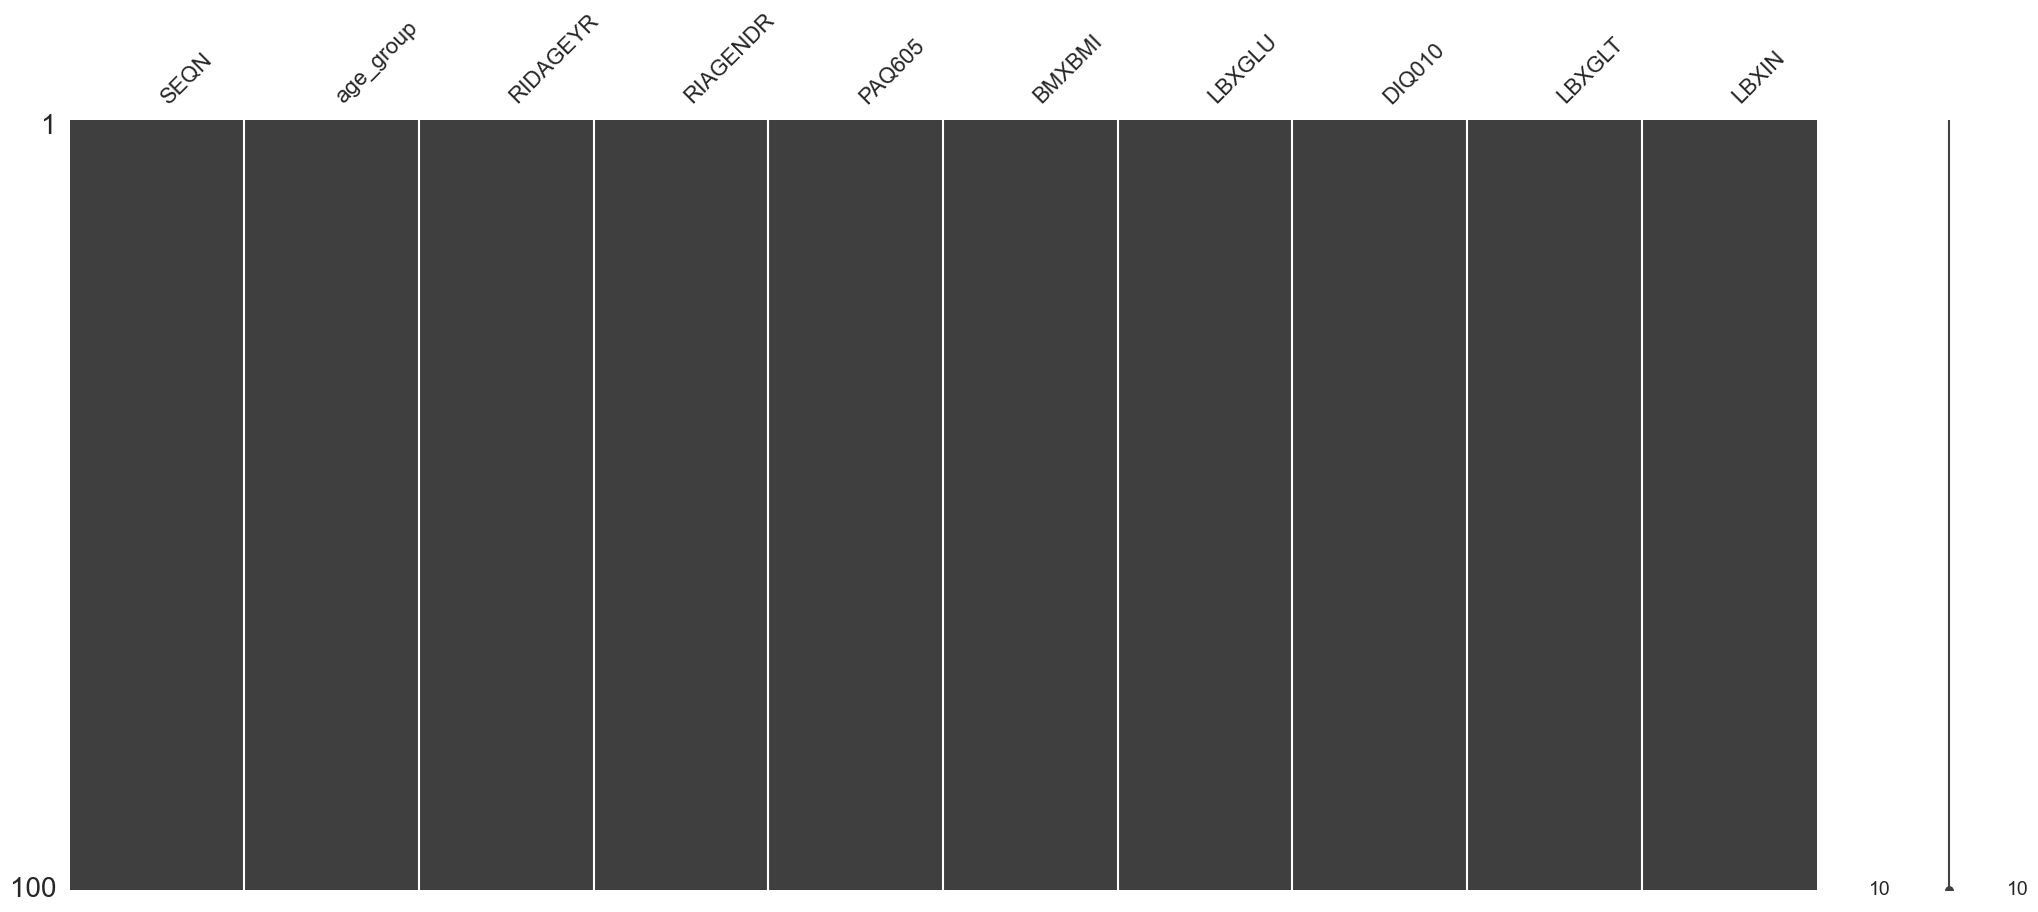

In [23]:
ax = msno.matrix(df.sample(100))

In [9]:
df.drop(['SEQN'], axis=1, inplace=True)

In [10]:
df.isnull().sum()

age_group    0
RIDAGEYR     0
RIAGENDR     0
PAQ605       0
BMXBMI       0
LBXGLU       0
DIQ010       0
LBXGLT       0
LBXIN        0
dtype: int64

In [17]:
df.rename(columns={'RIDAGEYR': 'age', 'RIAGENDR': 'gender', 'PAQ605': 'sport', 'BMXBMI': 'body_mass', 'LBXGLU': 
                   'blood_glucose', 'DIQ010': 'diabetic', 'LBXGLT': 'resp_oral', 'LBXIN': 'blood_insulin'}, inplace=True)

Renaming it just to make it easier to explain and understand the boxplot

In [18]:
df.describe()

,age,gender,sport,body_mass,blood_glucose,diabetic,resp_oral,blood_insulin
count,2278.000000,2278.000000,2278.000000,2278.000000,2278.000000,2278.000000,2278.000000,2278.000000
mean,41.795874,1.511414,1.822651,27.955180,99.553117,2.016242,114.978929,11.834794
std,20.156111,0.499979,0.398918,7.248962,17.889834,0.185556,47.061239,9.718812
min,12.000000,1.000000,1.000000,14.500000,63.000000,1.000000,40.000000,0.140000
25%,24.000000,1.000000,2.000000,22.800000,91.000000,2.000000,87.000000,5.860000
50%,41.000000,2.000000,2.000000,26.800000,97.000000,2.000000,105.000000,9.040000
75%,58.000000,2.000000,2.000000,31.200000,104.000000,2.000000,130.000000,14.440000
max,80.000000,2.000000,7.000000,70.100000,405.000000,3.000000,604.000000,102.290000


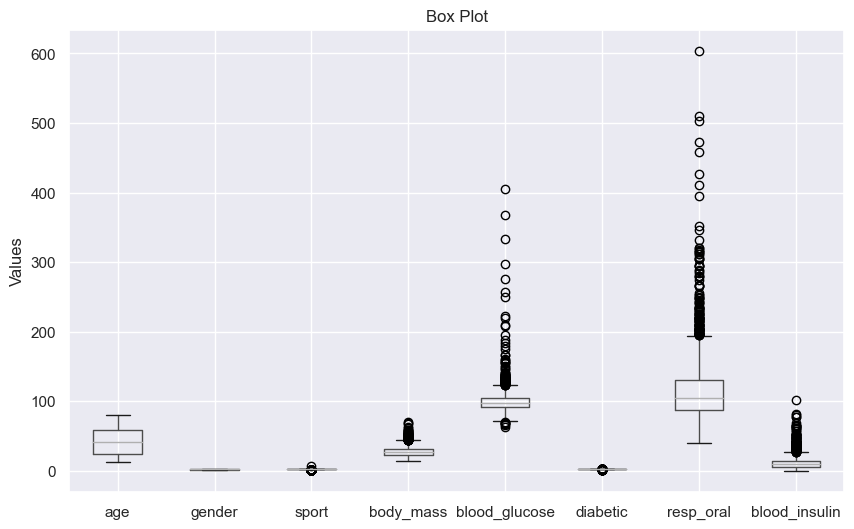

In [20]:
# Create a box plot chart for all columns
plt.figure(figsize=(10, 6))  # 
df.boxplot()

# Add labels and title
plt.title('Box Plot')
plt.ylabel('Values')

plt.show()

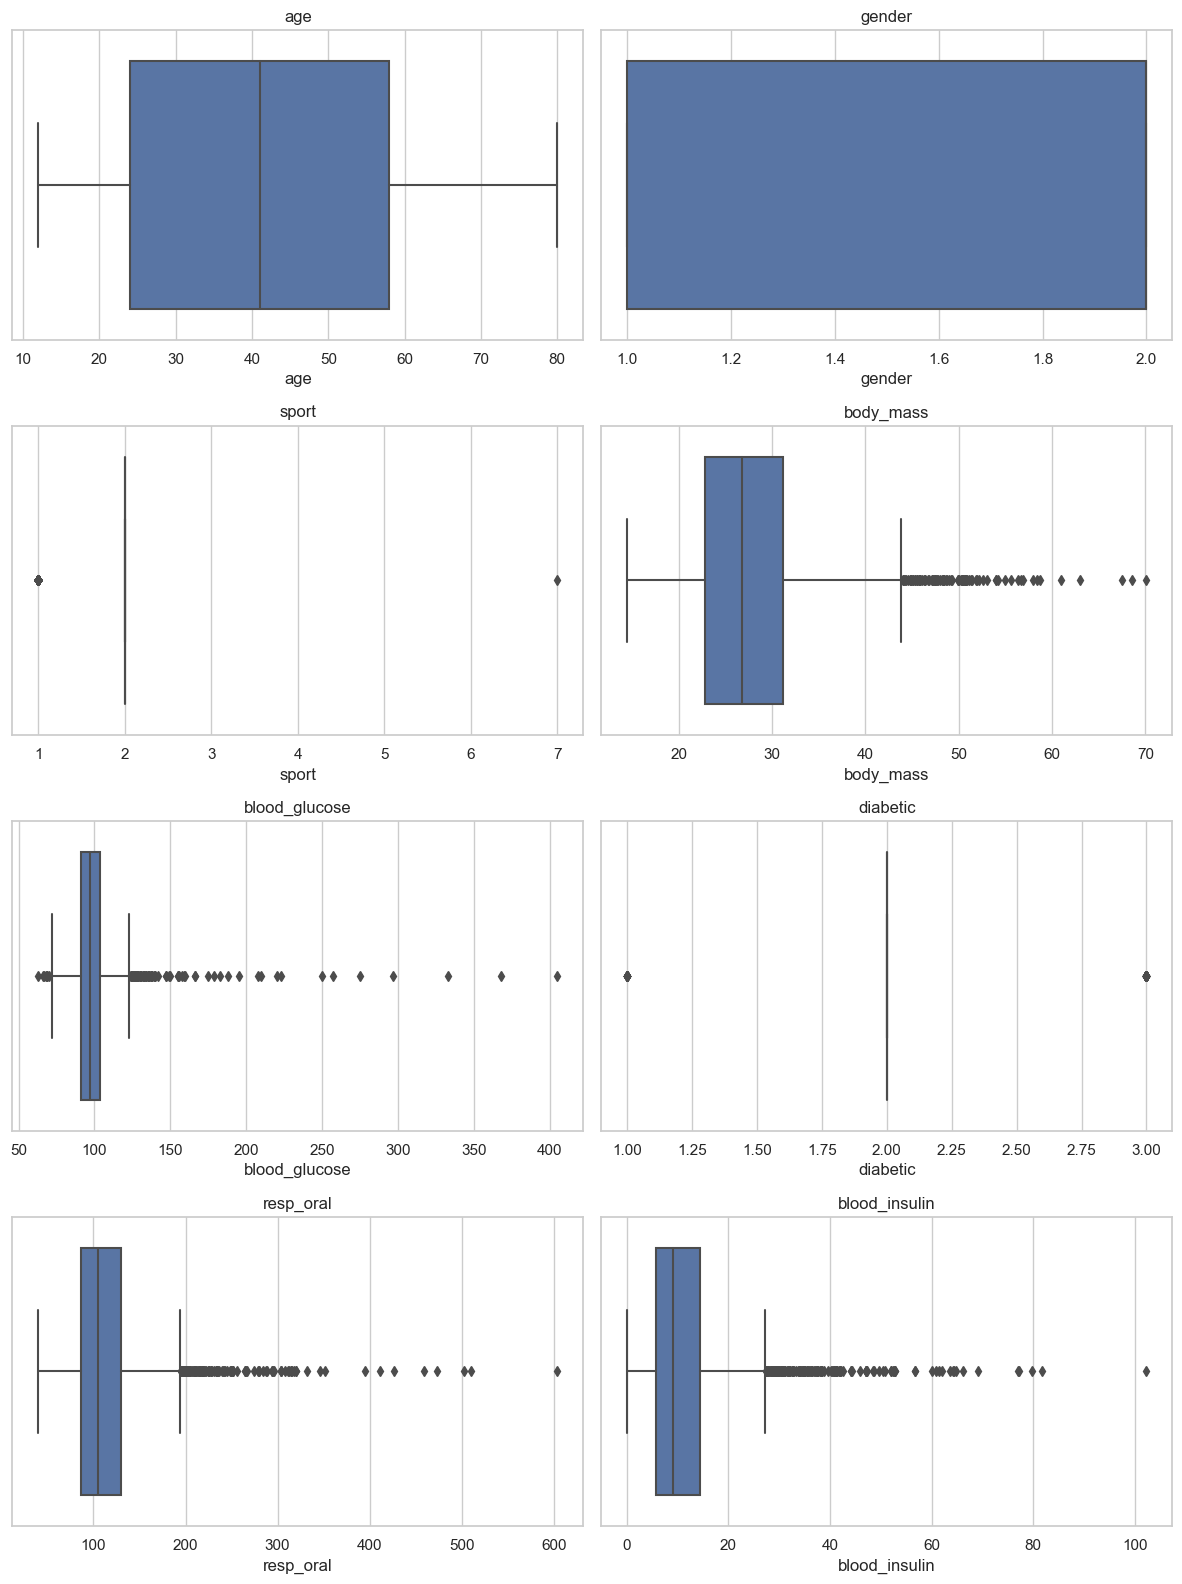

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns  

# Set the graphics style (optional)
sns.set(style="whitegrid")

# Create a figure and a set of axes for each variable
fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(12, 16))

# Columns DataFrame
columns = ['age', 'gender', 'sport', 'body_mass', 'blood_glucose', 'diabetic', 'resp_oral', 'blood_insulin']

# Iterate over the columns and create a box plot for each one
for i, col in enumerate(columns):
    sns.boxplot(x=df[col], ax=axes[i // 2, i % 2])
    axes[i // 2, i % 2].set_title(col)

# Adjust the layout to avoid overlapping
plt.tight_layout()
plt.show()

In [27]:
# Assuming 'age_group' is the target variable
X = df.drop('DIQ010', axis=1)
y = df['DIQ010']

In [28]:
X.shape, y.shape

((2278, 8), (2278,))

In [29]:
y

0       2.0
1       2.0
2       2.0
3       2.0
4       2.0
       ... 
2273    2.0
2274    2.0
2275    2.0
2276    2.0
2277    2.0
Name: DIQ010, Length: 2278, dtype: float64

In [30]:
df.head()

,age_group,RIDAGEYR,RIAGENDR,PAQ605,BMXBMI,LBXGLU,DIQ010,LBXGLT,LBXIN
0,Adult,61.0,2.0,2.0,35.7,110.0,2.0,150.0,14.91
1,Adult,26.0,2.0,2.0,20.3,89.0,2.0,80.0,3.85
2,Adult,16.0,1.0,2.0,23.2,89.0,2.0,68.0,6.14
3,Adult,32.0,1.0,2.0,28.9,104.0,2.0,84.0,16.15
4,Adult,38.0,2.0,1.0,35.9,103.0,2.0,81.0,10.92


In [31]:
from sklearn.preprocessing import LabelEncoder

In [32]:
le = LabelEncoder()
df.age_group = le.fit_transform(df_new.age_group)


I put the label Encoder code twice, because it was giving an error and after putting it back in the cell below, the code ran.

# Easy LDA

In [40]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

# Aplicar LabelEncoder nas colunas categóricas
label_encoder = LabelEncoder()
X['age_group'] = label_encoder.fit_transform(X['age_group'])

# Agora você pode tentar ajustar o modelo LDA novamente
lda = LinearDiscriminantAnalysis()
easy_lda = lda.fit_transform(X, y)

In [41]:
easy_lda 

array([[ 0.865 ,  0.4893],
       [-0.7758, -1.3348],
       [-1.1853, -0.6925],
       ...,
       [ 0.0142,  0.7507],
       [-0.2711,  0.1509],
       [-0.0582, -0.9658]])

In [42]:
lda.explained_variance_ratio_

array([0.9322, 0.0678])

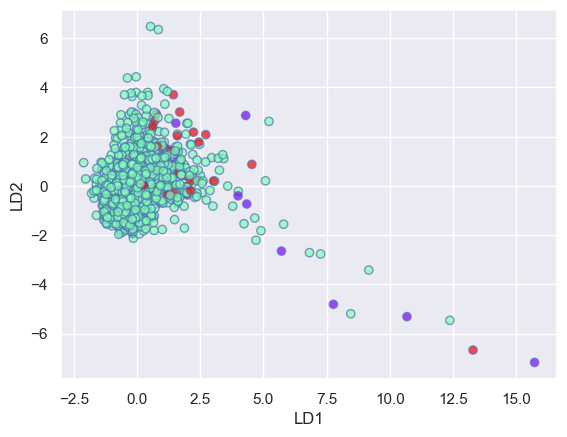

In [43]:
plt.xlabel('LD1')
plt.ylabel('LD2')
plt.scatter(
    easy_lda[:,0],
    easy_lda[:,1],
    c=y,
    cmap='rainbow',
    alpha=0.7,
    edgecolors='b'
)

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import accuracy_score

In [56]:
# Set parameters
n_averages = 10
n_features_max = df.shape[1] - 1  # Exclude the target variable

acc_clf1, acc_clf2 = [], []
n_features_range = range(1, n_features_max + 1)

for n_features in n_features_range:
    score_clf1, score_clf2 = 0, 0
    
    for _ in range(n_averages):
        # Select n_features columns randomly
        selected_features = np.random.choice(df.columns[:-1], size=n_features, replace=False)
        X = df[selected_features]
        y = df['DIQ010']
        
        # Split the data
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

        # LDA with shrinkage
        clf1 = LinearDiscriminantAnalysis(solver='lsqr', shrinkage=0.5).fit(X_train, y_train)
        score_clf1 += clf1.score(X_test, y_test)

        # LDA without shrinkage
        clf2 = LinearDiscriminantAnalysis(solver='lsqr', shrinkage=None).fit(X_train, y_train)
        score_clf2 += clf2.score(X_test, y_test)

    acc_clf1.append(score_clf1 / n_averages)
    acc_clf2.append(score_clf2 / n_averages)

LDA with and without shrinkage

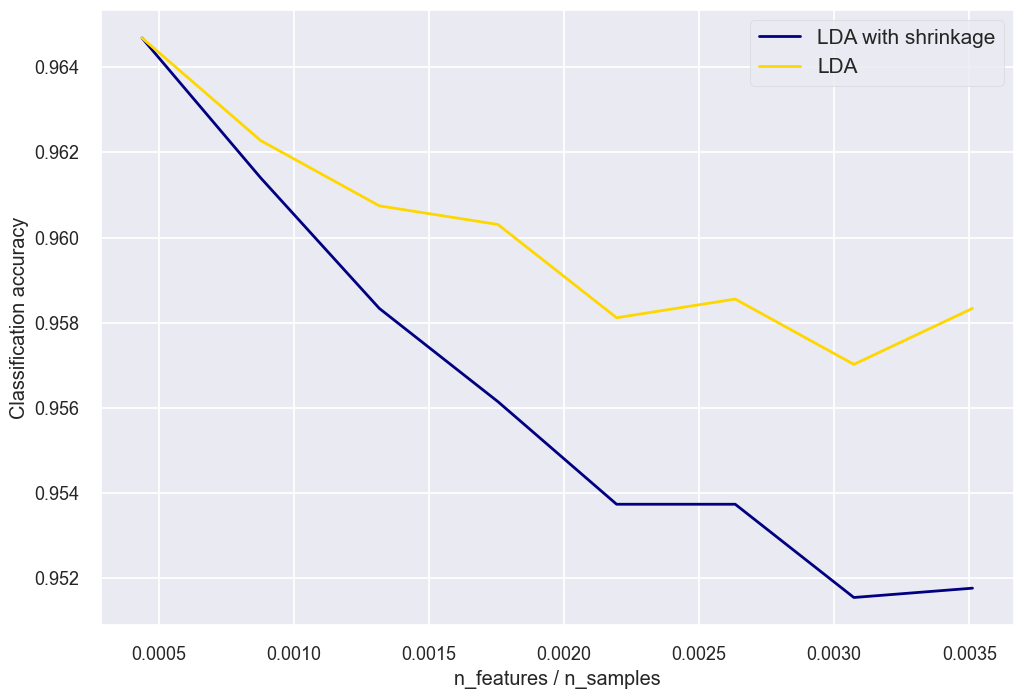

In [57]:
# Plotting
features_samples_ratio = np.array(n_features_range) / len(df)

with plt.style.context('seaborn-talk'):
    plt.plot(features_samples_ratio, acc_clf1, linewidth=2,
             label="LDA with shrinkage", color='navy')
    plt.plot(features_samples_ratio, acc_clf2, linewidth=2,
             label="LDA", color='gold')
    
    plt.xlabel('n_features / n_samples')
    plt.ylabel('Classification accuracy')
    plt.legend(prop={'size': 15})
    plt.tight_layout()
    plt.show()

Tive varios erros antão apliquei novamente, assim o codigo correu.

In [48]:
from sklearn.model_selection import train_test_split
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

# Supondo que você já tenha feito o pré-processamento e ajustado o modelo LDA
lda = LinearDiscriminantAnalysis()
X_lda = lda.fit_transform(X, y)

# Dividir os dados em conjuntos de treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(X_lda, y, random_state=1)

In [49]:
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)
y_pred = dt.predict(X_test)
confusion_matrix(y_test, y_pred)

array([[  0,   4,   0],
       [  4, 530,  15],
       [  0,  15,   2]], dtype=int64)

In [50]:
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, random_state=1)

In [51]:
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)
y_pred = dt.predict(X_test)
confusion_matrix(y_test, y_pred)

array([[  0,   3,   1],
       [  5, 527,  17],
       [  1,  15,   1]], dtype=int64)

In [52]:
X_train, X_test, y_train, y_test = train_test_split(easy_lda, y, random_state=1)

In [53]:
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)
y_pred = dt.predict(X_test)
confusion_matrix(y_test, y_pred)

array([[  0,   4,   0],
       [  4, 539,   6],
       [  0,  16,   1]], dtype=int64)

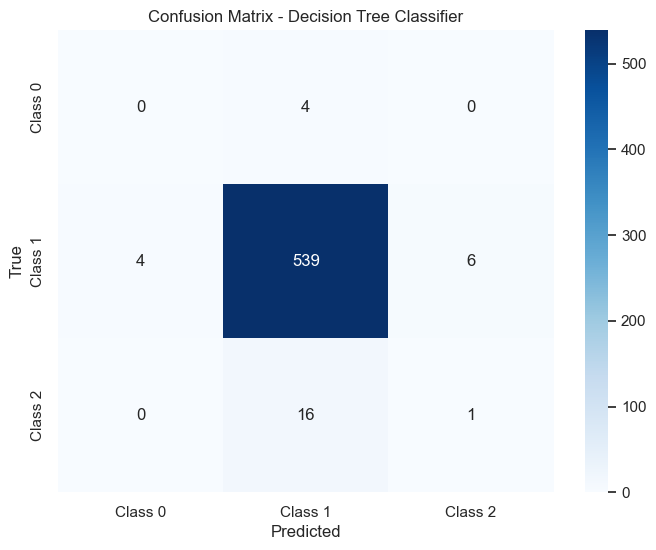

In [54]:
# Criate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot a confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Class 0', 'Class 1', 'Class 2'], yticklabels=['Class 0', 'Class 1', 'Class 2'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix - Decision Tree Classifier')
plt.show()

In [ ]:
X.iloc[0]

# PCA

In [55]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

In [59]:
# Assuming "failure_no_label" is a subset of your dataframe without the label column
failure_no_label = df.drop('DIQ010', axis=1)

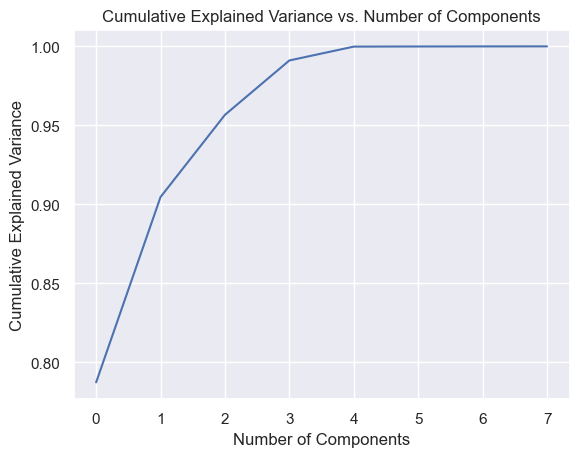

In [60]:
# Perform PCA
pca = PCA().fit(failure_no_label)

# Plot the cumulative explained variance
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Cumulative Explained Variance vs. Number of Components')
plt.grid(True)
plt.show()

This code uses the PCA class from scikit-learn to fit the PCA model on your data and then plots the cumulative explained variance. The x-axis represents the number of components, and the y-axis represents the cumulative explained variance. This plot can help you decide how many components to retain for your desired level of explained variance.

In [68]:
pca = PCA(4)
projected = pca.fit_transform(failure_no_label)

In [69]:
projected.shape

(2278, 4)

In [70]:
newfailure_df = pd.DataFrame(projected, columns =['F1', 'F2', 'F3', 'F4'])

In [71]:
newfailure_df.head()

,F1,F2,F3,F4
0,39.364935,-13.248331,2.069110,5.516297
1,-39.047395,9.309243,-2.911025,-9.224738
2,-51.780162,17.693345,0.926795,-6.594234
3,-29.519751,6.086783,13.394581,2.408945
4,-31.732745,-1.035038,13.490034,2.393234


In [72]:
newfailure_df['DIQ010'] = df['DIQ010']

In [74]:
newfailure_df.head()

,F1,F2,F3,F4,DIQ010
0,39.364935,-13.248331,2.069110,5.516297,2.0
1,-39.047395,9.309243,-2.911025,-9.224738,2.0
2,-51.780162,17.693345,0.926795,-6.594234,2.0
3,-29.519751,6.086783,13.394581,2.408945,2.0
4,-31.732745,-1.035038,13.490034,2.393234,2.0


In [130]:
from sklearn.decomposition import PCA ####
pca = PCA(n_components=4)
X_pca = pca.fit_transform(X, y)

In [131]:
pca.explained_variance_ratio_####

array([9.99638262e-01, 2.84860827e-04, 4.24308929e-05, 1.88032815e-05])

In [132]:
X_pca####

array([[ 5.12785330e+03,  3.97021568e+01, -1.29421447e+01,
         1.57070215e+00],
       [ 5.12385363e+03, -3.87115716e+01,  9.60297334e+00,
        -3.37119226e+00],
       [ 5.11585493e+03, -5.14447758e+01,  1.79875247e+01,
         4.57323139e-01],
       ...,
       [-5.02114668e+03,  8.25904730e+00,  1.00294571e+01,
         2.01543247e+00],
       [-5.02614549e+03, -7.05508942e+00, -2.04360307e+01,
        -7.20806212e+00],
       [-5.03514771e+03, -7.57914741e+00,  1.37724433e+01,
         8.07997369e+00]])

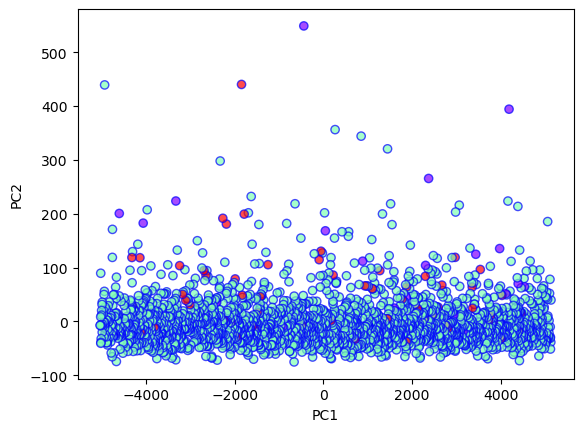

In [133]:
plt.xlabel('PC1')####
plt.ylabel('PC2')
plt.scatter(
    X_pca[:,0],
    X_pca[:,1],
    c=y,
    cmap='rainbow',
    alpha=0.7,
    edgecolors='b'
)

In [75]:
df_array=newfailure_df.values 

In [76]:
from sklearn.model_selection import train_test_split
X = df_array[:,0:4]
y = df_array[:,2]
X_train, X_validation, Y_train, Y_validation = train_test_split(X, y, test_size=0.20, random_state=1)

In [111]:
# Importing decision tree classifier from sklearn library
from sklearn.tree import DecisionTreeClassifier

# Fitting the decision tree with default hyperparameters, apart from
# max_depth which is 5 so that we can plot and read the tree.
dt_default = DecisionTreeClassifier(max_depth=5)
dt_default.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=5)

In [112]:
# Let's check the evaluation metrics of our default model

# Importing classification report and confusion matrix from sklearn metrics
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Making predictions
y_pred_default = dt_default.predict(X_test)

# Printing classification report
print(classification_report(y_test, y_pred_default))

              precision    recall  f1-score   support

         1.0       0.00      0.00      0.00         4
         2.0       0.97      0.99      0.98       664
         3.0       0.00      0.00      0.00        16

    accuracy                           0.96       684
   macro avg       0.32      0.33      0.33       684
weighted avg       0.94      0.96      0.95       684



In [113]:
# Printing confusion matrix and accuracy
print(confusion_matrix(y_test,y_pred_default))
print(accuracy_score(y_test,y_pred_default))

[[  0   3   1]
 [  3 658   3]
 [  0  16   0]]
0.9619883040935673


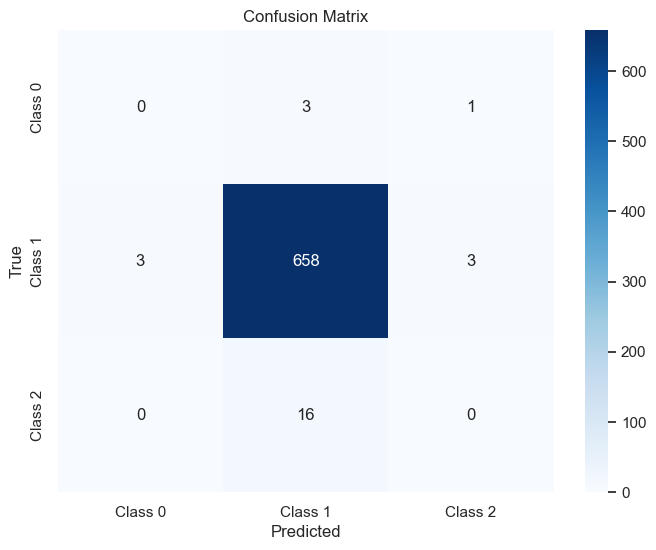

Accuracy: 0.9619883040935673


In [115]:
# Assuming you have the confusion matrix stored in the variable conf_matrix
conf_matrix = confusion_matrix(y_test, y_pred_default)

# Plotting the confusion matrix using seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Class 0', 'Class 1', 'Class 2'],
            yticklabels=['Class 0', 'Class 1', 'Class 2'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

# Printing accuracy
print("Accuracy:", accuracy_score(y_test, y_pred_default))

[Text(0.5347222222222222, 0.9166666666666666, 'x[6] <= 217.0\ngini = 0.072\nsamples = 1594\nvalue = [17, 1535, 42]'),
 Text(0.3194444444444444, 0.75, 'x[5] <= 108.5\ngini = 0.051\nsamples = 1534\nvalue = [9, 1494, 31]'),
 Text(0.18055555555555555, 0.5833333333333334, 'x[4] <= 60.85\ngini = 0.028\nsamples = 1344\nvalue = [6, 1325, 13]'),
 Text(0.1111111111111111, 0.4166666666666667, 'x[6] <= 165.5\ngini = 0.027\nsamples = 1341\nvalue = [6, 1323, 12]'),
 Text(0.05555555555555555, 0.25, 'x[1] <= 58.5\ngini = 0.022\nsamples = 1291\nvalue = [4, 1277, 10]'),
 Text(0.027777777777777776, 0.08333333333333333, 'gini = 0.012\nsamples = 1035\nvalue = [1, 1029, 5]'),
 Text(0.08333333333333333, 0.08333333333333333, 'gini = 0.061\nsamples = 256\nvalue = [3, 248, 5]'),
 Text(0.16666666666666666, 0.25, 'x[5] <= 89.0\ngini = 0.15\nsamples = 50\nvalue = [2, 46, 2]'),
 Text(0.1388888888888889, 0.08333333333333333, 'gini = 0.444\nsamples = 3\nvalue = [1, 2, 0]'),
 Text(0.19444444444444445, 0.08333333333333

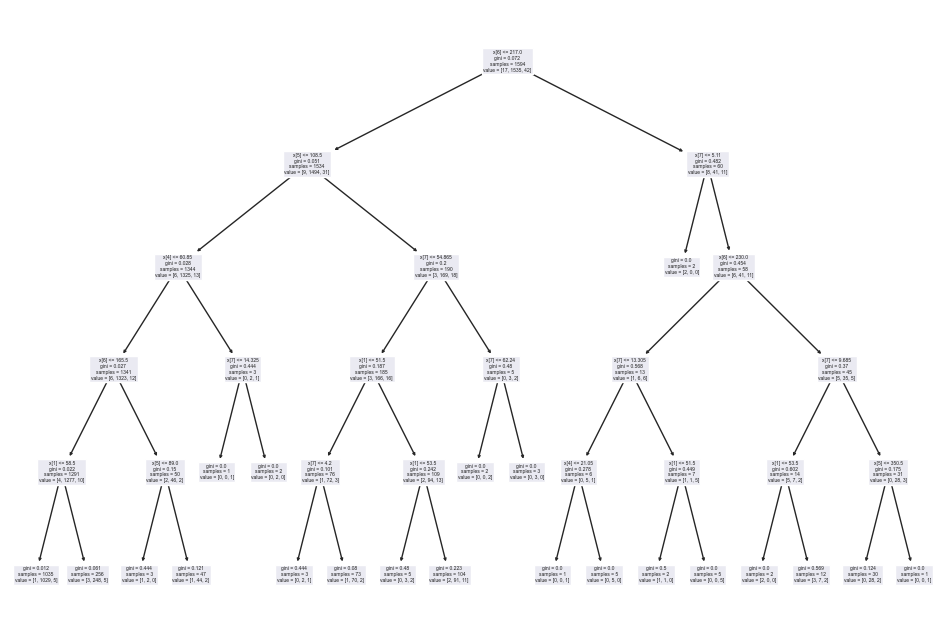

In [116]:
import matplotlib.pyplot as plt
from sklearn import tree

# Set the size of the figure
plt.figure(figsize = (12, 8))

# Display the tree by calling a method plot_tree()
tree.plot_tree(dt_default)

# Grid Search to Find Optimal Hyperparameters

In [117]:
from sklearn.model_selection import GridSearchCV

# Create the parameter grid 
param_grid = {
    'max_depth': range(5, 15, 2),
    'criterion': ["entropy", "gini"]
}

n_folds = 5

# Instantiate the grid search model
dtree = DecisionTreeClassifier()
grid_search = GridSearchCV(estimator = dtree, param_grid = param_grid, 
                          cv = n_folds, verbose = 1)

# Fit the grid search to the data
grid_search.fit(X_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['entropy', 'gini'],
                         'max_depth': range(5, 15, 2)},
             verbose=1)

In [118]:
# cv results
cv_results = pd.DataFrame(grid_search.cv_results_)
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,param_max_depth,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.011011,0.002064,0.000000,0.000000,entropy,5,"{'criterion': 'entropy', 'max_depth': 5}",0.959248,0.949843,0.956113,0.956113,0.955975,0.955458,0.003066,1
1,0.008935,0.001948,0.001011,0.002023,entropy,7,"{'criterion': 'entropy', 'max_depth': 7}",0.946708,0.949843,0.943574,0.934169,0.946541,0.944167,0.005378,4
2,0.009972,0.004466,0.000000,0.000000,entropy,9,"{'criterion': 'entropy', 'max_depth': 9}",0.927900,0.946708,0.940439,0.940439,0.937107,0.938519,0.006151,6
3,0.008056,0.002442,0.001984,0.002431,entropy,11,"{'criterion': 'entropy', 'max_depth': 11}",0.924765,0.943574,0.931034,0.934169,0.930818,0.932872,0.006157,7
4,0.008995,0.003739,0.001002,0.002003,entropy,13,"{'criterion': 'entropy', 'max_depth': 13}",0.924765,0.934169,0.943574,0.934169,0.927673,0.932870,0.006491,8
5,0.005022,0.003099,0.001999,0.003997,gini,5,"{'criterion': 'gini', 'max_depth': 5}",0.956113,0.956113,0.956113,0.946708,0.955975,0.954204,0.003748,2
6,0.007932,0.003977,0.000000,0.000000,gini,7,"{'criterion': 'gini', 'max_depth': 7}",0.952978,0.940439,0.946708,0.946708,0.955975,0.948562,0.005428,3
7,0.005924,0.004903,0.001076,0.002151,gini,9,"{'criterion': 'gini', 'max_depth': 9}",0.940439,0.931034,0.937304,0.940439,0.955975,0.941038,0.008220,5
8,0.005527,0.002349,0.003296,0.002704,gini,11,"{'criterion': 'gini', 'max_depth': 11}",0.927900,0.924765,0.912226,0.931034,0.933962,0.925977,0.007531,9
9,0.008872,0.002398,0.000000,0.000000,gini,13,"{'criterion': 'gini', 'max_depth': 13}",0.927900,0.909091,0.905956,0.927900,0.943396,0.922849,0.013769,10


In [119]:
# printing the optimal accuracy score and hyperparameters
print("best accuracy", grid_search.best_score_)
print(grid_search.best_estimator_)

best accuracy 0.9554582914374716
DecisionTreeClassifier(criterion='entropy', max_depth=5)


In [120]:
# Find the highest accuracy value
cv_results['mean_test_score'].max()

# The depth of the tree is 9 for this accuracy

0.9554582914374716

Running the model with best parameters obtained from grid search.

In [121]:
# model with optimal hyperparameters
clf_gini = DecisionTreeClassifier(criterion = "gini", 
                                  random_state = 100,
                                  max_depth=9)
clf_gini.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=9, random_state=100)

In [122]:
# accuracy score
clf_gini.score(X_test,y_test)

0.9532163742690059

[Text(0.6544449458483754, 0.95, 'x[6] <= 217.0\ngini = 0.072\nsamples = 1594\nvalue = [17, 1535, 42]'),
 Text(0.47134476534296027, 0.85, 'x[5] <= 108.5\ngini = 0.051\nsamples = 1534\nvalue = [9, 1494, 31]'),
 Text(0.3203971119133574, 0.75, 'x[4] <= 60.85\ngini = 0.028\nsamples = 1344\nvalue = [6, 1325, 13]'),
 Text(0.2509025270758123, 0.65, 'x[6] <= 165.5\ngini = 0.027\nsamples = 1341\nvalue = [6, 1323, 12]'),
 Text(0.1552346570397112, 0.55, 'x[1] <= 58.5\ngini = 0.022\nsamples = 1291\nvalue = [4, 1277, 10]'),
 Text(0.05776173285198556, 0.45, 'x[5] <= 93.5\ngini = 0.012\nsamples = 1035\nvalue = [1, 1029, 5]'),
 Text(0.02888086642599278, 0.35, 'x[6] <= 97.5\ngini = 0.023\nsamples = 428\nvalue = [0, 423, 5]'),
 Text(0.01444043321299639, 0.25, 'gini = 0.0\nsamples = 256\nvalue = [0, 256, 0]'),
 Text(0.04332129963898917, 0.25, 'x[6] <= 115.5\ngini = 0.056\nsamples = 172\nvalue = [0, 167, 5]'),
 Text(0.02888086642599278, 0.15, 'x[1] <= 33.5\ngini = 0.107\nsamples = 88\nvalue = [0, 83, 5]'),

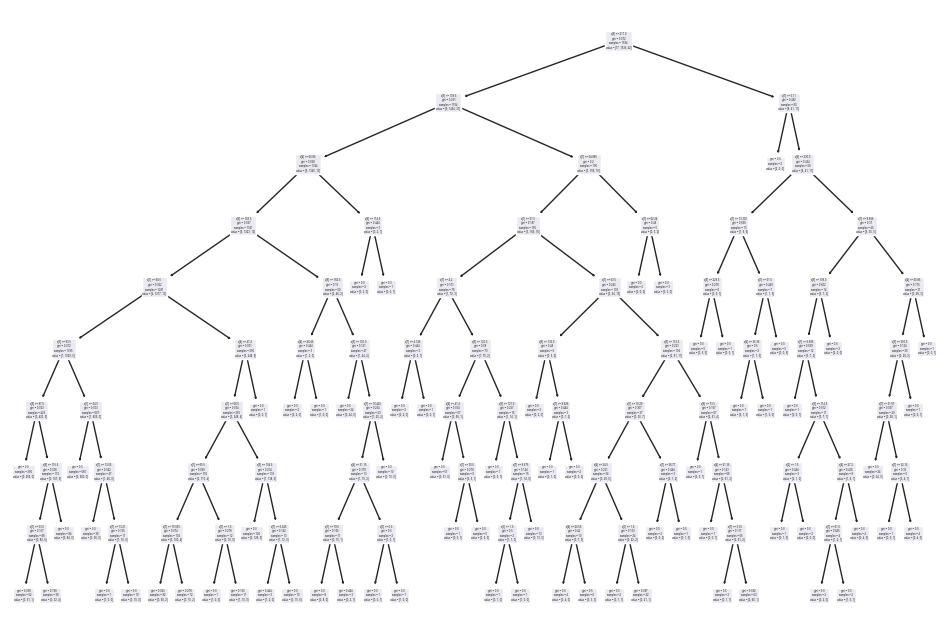

In [123]:
import matplotlib.pyplot as plt
from sklearn import tree

# Set the size of the figure
plt.figure(figsize = (12, 8))

# Display the tree by calling a method plot_tree()
tree.plot_tree(clf_gini)

reducing the tree

In [124]:
# tree with max_depth = 3
clf_gini = DecisionTreeClassifier(criterion = "gini", 
                                  random_state = 100,
                                  max_depth=3, 
                                  min_samples_leaf=50,
                                  min_samples_split=50)
clf_gini.fit(X_train, y_train)

# score
print(clf_gini.score(X_test,y_test))

0.9707602339181286


[Text(0.625, 0.875, 'x[6] <= 217.0\ngini = 0.072\nsamples = 1594\nvalue = [17, 1535, 42]'),
 Text(0.5, 0.625, 'x[5] <= 108.5\ngini = 0.051\nsamples = 1534\nvalue = [9, 1494, 31]'),
 Text(0.25, 0.375, 'x[6] <= 165.5\ngini = 0.028\nsamples = 1344\nvalue = [6, 1325, 13]'),
 Text(0.125, 0.125, 'gini = 0.023\nsamples = 1294\nvalue = [4, 1279, 11]'),
 Text(0.375, 0.125, 'gini = 0.15\nsamples = 50\nvalue = [2, 46, 2]'),
 Text(0.75, 0.375, 'x[1] <= 49.5\ngini = 0.2\nsamples = 190\nvalue = [3, 169, 18]'),
 Text(0.625, 0.125, 'gini = 0.134\nsamples = 70\nvalue = [1, 65, 4]'),
 Text(0.875, 0.125, 'gini = 0.235\nsamples = 120\nvalue = [2, 104, 14]'),
 Text(0.75, 0.625, 'gini = 0.482\nsamples = 60\nvalue = [8, 41, 11]')]

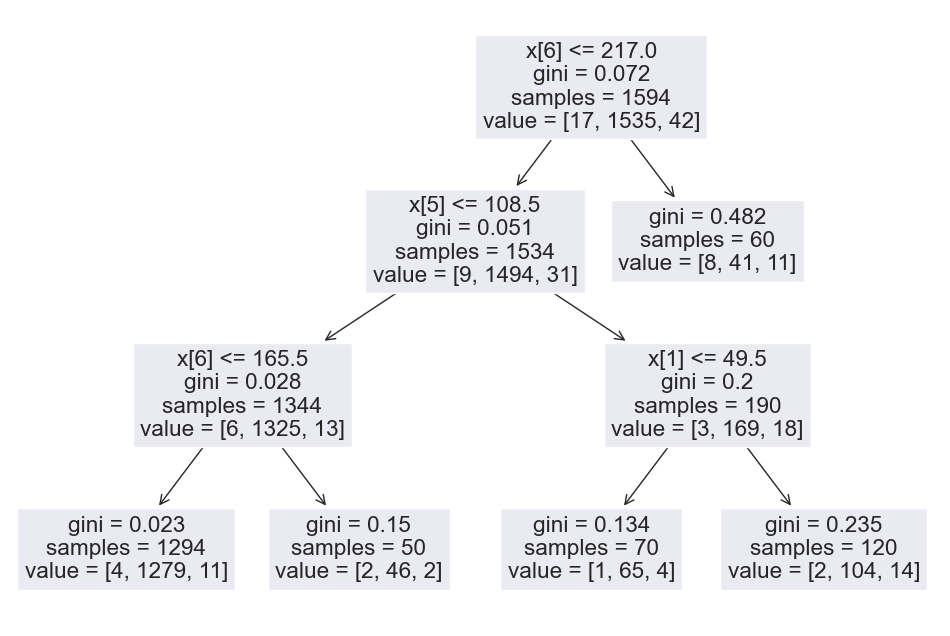

In [125]:
import matplotlib.pyplot as plt
from sklearn import tree

# Set the size of the figure
plt.figure(figsize = (12, 8))

# Display the tree by calling a method plot_tree()
tree.plot_tree(clf_gini)

In [126]:
# classification metrics
from sklearn.metrics import classification_report,confusion_matrix
y_pred = clf_gini.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         1.0       0.00      0.00      0.00         4
         2.0       0.97      1.00      0.99       664
         3.0       0.00      0.00      0.00        16

    accuracy                           0.97       684
   macro avg       0.32      0.33      0.33       684
weighted avg       0.94      0.97      0.96       684



C:\Users\karik\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\karik\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\karik\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [127]:
# confusion matrix
print(confusion_matrix(y_test,y_pred))

[[  0   4   0]
 [  0 664   0]
 [  0  16   0]]


Text(0.5, 1.0, 'Confusion Matrix')

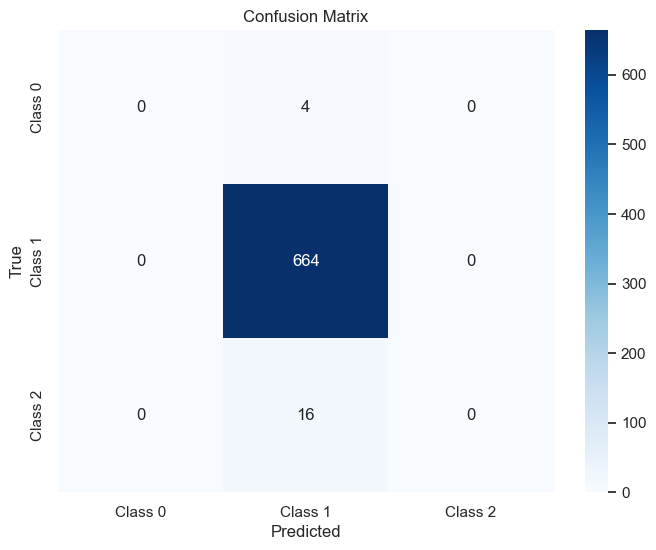

In [133]:
# Assuming you have the confusion matrix stored in the variable conf_matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plotting the confusion matrix using seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Class 0', 'Class 1', 'Class 2'],
            yticklabels=['Class 0', 'Class 1', 'Class 2'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')

# Comparison LDA and PCA

In [171]:
from sklearn.preprocessing import LabelEncoder

# Aplicar LabelEncoder nas colunas categóricas
label_encoder = LabelEncoder()
X['age_group'] = label_encoder.fit_transform(X['age_group'])


In [174]:
X.head()

,age_group,RIDAGEYR,RIAGENDR,PAQ605,BMXBMI,LBXGLU,LBXGLT,LBXIN
0,0,61.0,2.0,2.0,35.7,110.0,150.0,14.91
1,0,26.0,2.0,2.0,20.3,89.0,80.0,3.85
2,0,16.0,1.0,2.0,23.2,89.0,68.0,6.14
3,0,32.0,1.0,2.0,28.9,104.0,84.0,16.15
4,0,38.0,2.0,1.0,35.9,103.0,81.0,10.92


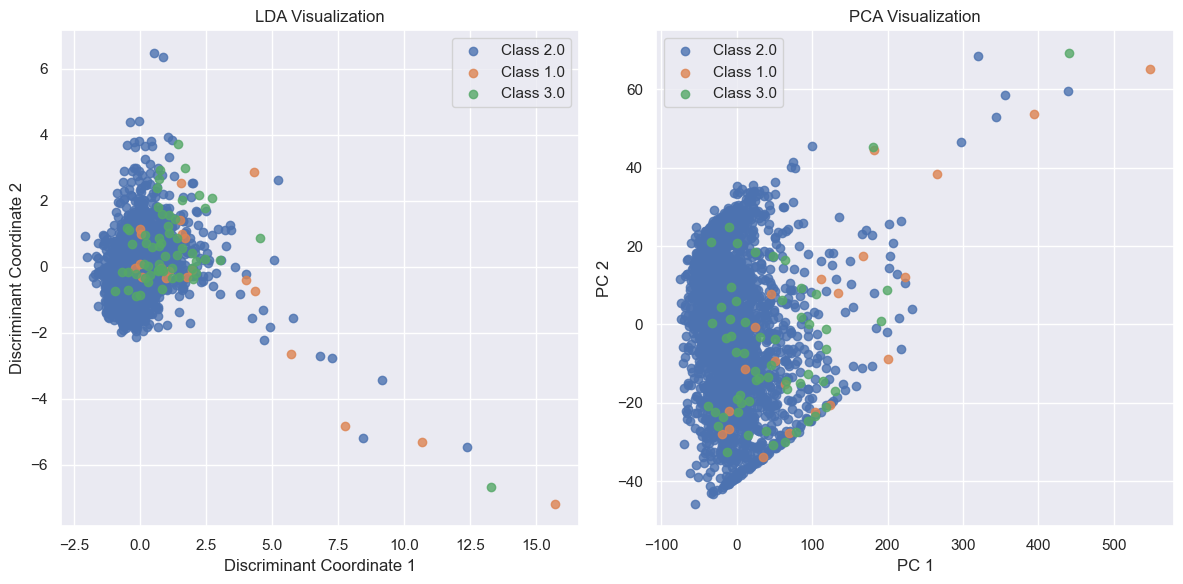

In [180]:
# Apply Dimensionality Reduction
lda = LinearDiscriminantAnalysis(n_components=2
                            )
X_r_lda = lda.fit_transform(X, y)

pca = PCA(n_components=4)
X_r_pca = pca.fit_transform(X)

# Visualize the Results
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
for class_label in y.unique():
    mask = (y == class_label)
    plt.scatter(X_r_lda[mask, 0], X_r_lda[mask, 1], label=f'Class {class_label}', alpha=0.8)
plt.title('LDA Visualization')
plt.xlabel('Discriminant Coordinate 1')
plt.ylabel('Discriminant Coordinate 2')
plt.legend()

plt.subplot(1, 2, 2)
for class_label in y.unique():
    mask = (y == class_label)
    plt.scatter(X_r_pca[mask, 0], X_r_pca[mask, 1], label=f'Class {class_label}', alpha=0.8)
plt.title('PCA Visualization')
plt.xlabel('PC 1')
plt.ylabel('PC 2')
plt.legend()

plt.tight_layout()
plt.show()

# K-Means Clustering

In [69]:
# Import libraries
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split


In [70]:
# Split the data into training and testing
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 1)

X.shape, y.shape, X_train.shape, X_test.shape, y_train.shape, y_test.shape

((2278, 7), (2278,), (1708, 7), (570, 7), (1708,), (570,))

In [71]:
from sklearn.preprocessing import StandardScaler

# Create an object using Standard scalscaler
scaler = StandardScaler()

# Train the StandardScaler model
scaler.fit(X_train)

# transform data
X_train_scaled = scaler.transform(X_train)
X_test_scaled  = scaler.transform(X_test)
X_scaled = scaler.transform(X)

# print dataset after scaling
print(X_train_scaled, '\t', X_test_scaled, '\t', X_scaled)

[[ 1.13446714  0.97228098  0.43402252 ...  0.99391987  0.61354148
   2.39857125]
 [-0.79032146 -1.02850927  0.43402252 ...  0.42435461 -0.14621412
  -0.82019152]
 [-1.03708923  0.97228098 -2.05359648 ... -0.55943992  0.1001931
   1.50080728]
 ...
 [ 0.83834582  0.97228098 -2.05359648 ... -0.4558826  -0.90596972
  -0.94293665]
 [-1.48127121  0.97228098  0.43402252 ... -0.09343198 -0.16674806
   0.15568298]
 [-1.23450344 -1.02850927  0.43402252 ... -0.14521064 -1.00863939
  -0.71164831]] 	 [[-6.64597036e-04  9.72280976e-01  4.34022518e-01 ... -4.04103942e-01
   2.02862775e-01  1.03947428e-01]
 [-8.39675011e-01 -1.02850927e+00  4.34022518e-01 ... -4.55882602e-01
  -4.13155276e-01  2.75384839e-01]
 [ 2.95456726e-01  9.72280976e-01  4.34022518e-01 ... -4.16533245e-02
   5.93007541e-01  6.75067326e-01]
 ...
 [ 4.92870941e-01  9.72280976e-01  4.34022518e-01 ... -7.14775900e-01
  -6.80096432e-01 -4.85432076e-01]
 [ 1.43058846e+00 -1.02850927e+00 -2.05359648e+00 ...  7.35026570e-01
  -5.1582495

In [72]:
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans

# generate synthetic two-dimensional data
X, y = make_blobs(random_state=1)

print(X, y)

[[-7.94152277e-01  2.10495117e+00]
 [-9.15155186e+00 -4.81286449e+00]
 [-1.14418263e+01 -4.45781441e+00]
 [-9.76761777e+00 -3.19133737e+00]
 [-4.53655648e+00 -8.40186288e+00]
 [-6.26302115e+00 -8.10666081e+00]
 [-6.38481234e+00 -8.47302970e+00]
 [-9.20490564e+00 -4.57687928e+00]
 [-2.76017908e+00  5.55121358e+00]
 [-1.17104176e+00  4.33091816e+00]
 [-1.00364080e+01 -5.56912090e+00]
 [-9.87589123e+00 -2.82386464e+00]
 [-7.17532921e+00 -8.77059017e+00]
 [-2.40671820e+00  6.09894447e+00]
 [-4.87418245e+00 -1.00495890e+01]
 [-6.07854700e+00 -7.93969420e+00]
 [-6.83238762e+00 -7.47067670e+00]
 [-2.34673261e+00  3.56128423e+00]
 [-1.03415662e+01 -3.90975169e+00]
 [-1.10926243e+01 -3.78396611e+00]
 [-6.50212109e+00 -7.91249101e+00]
 [-1.02639310e+01 -3.92073400e+00]
 [-6.81608302e+00 -8.44986926e+00]
 [-1.34052081e+00  4.15711949e+00]
 [-1.03729975e+01 -4.59207895e+00]
 [-7.37499896e+00 -1.05880659e+01]
 [-6.62351774e+00 -8.25338334e+00]
 [-1.35938959e+00  4.05424002e+00]
 [-1.97451969e-01  2

In [73]:
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans

# generate synthetic two-dimensional data
X, y = make_blobs(random_state=3)

# build the clustering model
kmeans = KMeans(n_clusters=3)

# Train the model
kmeans.fit(X)

C:\Users\karik\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\karik\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


KMeans(n_clusters=3)

In [74]:
print("Cluster memberships:\n{}".format(kmeans.labels_))

Cluster memberships:
[1 2 2 2 1 2 2 1 2 0 2 1 1 1 0 2 1 1 2 2 0 0 2 0 2 1 1 0 2 1 0 0 1 2 1 1 0
 0 0 1 1 1 0 0 2 2 0 2 1 2 0 1 2 1 2 1 2 1 0 0 0 2 0 0 2 0 1 2 0 2 2 1 0 2
 0 0 2 0 1 2 0 0 0 0 1 0 2 1 0 1 0 1 1 2 1 2 2 0 1 1]


In [75]:
print(kmeans.predict(X))

[1 2 2 2 1 2 2 1 2 0 2 1 1 1 0 2 1 1 2 2 0 0 2 0 2 1 1 0 2 1 0 0 1 2 1 1 0
 0 0 1 1 1 0 0 2 2 0 2 1 2 0 1 2 1 2 1 2 1 0 0 0 2 0 0 2 0 1 2 0 2 2 1 0 2
 0 0 2 0 1 2 0 0 0 0 1 0 2 1 0 1 0 1 1 2 1 2 2 0 1 1]


In [76]:
import mglearn

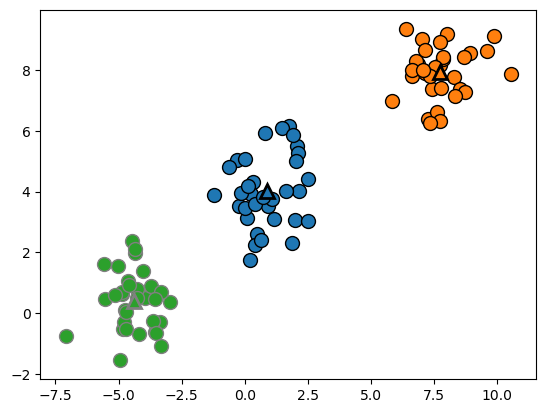

In [77]:
# Use mglearn to plot the graph
mglearn.discrete_scatter(X[:, 0], X[:, 1], kmeans.labels_, markers='o')

mglearn.discrete_scatter(
kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], [0, 1, 2],
markers='^', markeredgewidth=2)

C:\Users\karik\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\karik\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\karik\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\karik\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are

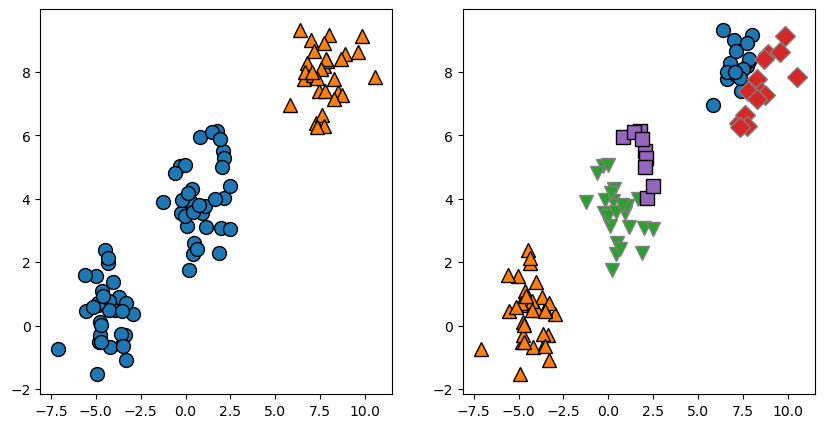

In [78]:
fig, axes = plt.subplots(1, 2, figsize=(10, 5))
# using two cluster centers:
kmeans = KMeans(n_clusters=2, random_state=38 )
kmeans.fit(X)
assignments = kmeans.labels_
mglearn.discrete_scatter(X[:, 0], X[:, 1], assignments, ax=axes[0])
# using five cluster centers:
kmeans = KMeans(n_clusters=5, random_state=38)
kmeans.fit(X)
assignments = kmeans.labels_
mglearn.discrete_scatter(X[:, 0], X[:, 1], assignments, ax=axes[1])

C:\Users\karik\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\karik\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


Text(0, 0.5, 'Feature 1')

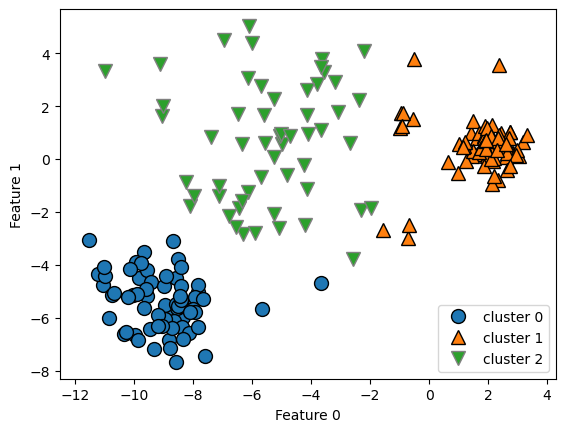

In [79]:
X_varied, y_varied = make_blobs(n_samples=200,
cluster_std=[1.0, 2.5, 0.5],
random_state=170)
y_pred = KMeans(n_clusters=3, random_state=0).fit_predict(X_varied)
mglearn.discrete_scatter(X_varied[:, 0], X_varied[:, 1], y_pred)
plt.legend(["cluster 0", "cluster 1", "cluster 2"], loc='best')
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")

In [80]:
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import accuracy_score, silhouette_score
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from scipy.spatial.distance import cdist
import math

In [81]:
kmeans_NHANES= KMeans(n_clusters = 3)
kmeans_NHANES.fit(X)
C = kmeans_NHANES.labels_
C.shape
assign_NHANES= C.reshape(-1, 1)

C:\Users\karik\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\karik\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [110]:
X = df.drop(columns=["DIQ010"])
y = df['DIQ010']

In [111]:
# Importar bibliotecas necessárias
import pandas as pd
from sklearn.preprocessing import LabelEncoder

# Supondo que você tenha um DataFrame df e quer codificar a coluna 'age_group'
le = LabelEncoder()
df['age_group_encoded'] = le.fit_transform(df['age_group'])

In [112]:
print(X.columns)

Index(['SEQN', 'age_group', 'RIDAGEYR', 'RIAGENDR', 'PAQ605', 'BMXBMI',
       'LBXGLU', 'LBXGLT', 'LBXIN', 'cluster_labels', 'age_group_encoded'],
      dtype='object')


In [113]:
print(X.head())

      SEQN  age_group  RIDAGEYR  RIAGENDR  PAQ605  BMXBMI  LBXGLU  LBXGLT  \
0  73564.0          0      61.0       2.0     2.0    35.7   110.0   150.0   
1  73568.0          0      26.0       2.0     2.0    20.3    89.0    80.0   
2  73576.0          0      16.0       1.0     2.0    23.2    89.0    68.0   
3  73577.0          0      32.0       1.0     2.0    28.9   104.0    84.0   
4  73580.0          0      38.0       2.0     1.0    35.9   103.0    81.0   

   LBXIN  cluster_labels  age_group_encoded  
0  14.91               1                  0  
1   3.85               1                  0  
2   6.14               1                  0  
3  16.15               1                  0  
4  10.92               1                  0  


In [114]:
X = pd.DataFrame(X).reset_index(drop=True)

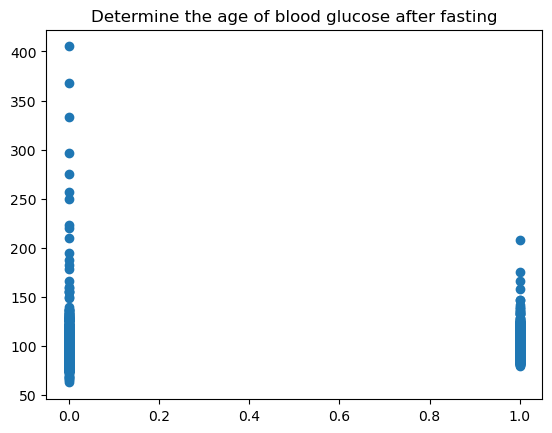

In [115]:
plt.scatter(X['age_group'], X['LBXGLU'])
plt.title('Determine the age of blood glucose after fasting')
plt.show()

In [116]:
import numpy as np

# To plot the cluster data, consider two columns
X1 = X['age_group']
X2 = X['LBXGLU']

# Transform into numpy array
X11 = X1[:, ]
X22 = X2[:, ]

# Display rows and columns of the arrays
X11.shape, X22.shape, assign_NHANES.shape

((2278,), (2278,), (100, 1))

In [117]:
from sklearn.cluster import KMeans 
from sklearn.metrics import silhouette_score

# Instantiate the kMeans models
km =KMeans(n_clusters = 2,random_state=42)

# Fit the Khleans model
km.fit_predict(X)

# Catculate Silhoutte Score
score = silhouette_score(X, km.labels_, metric='euclidean')

# Print the score
print ('Silhouetter Score: %.3f' % score)

C:\Users\karik\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Silhouetter Score: 0.633


In [118]:
from sklearn.cluster import KMeans 
from sklearn.metrics import silhouette_score

# Instantiate the kMeans models
km =KMeans(n_clusters = 3,random_state=42)

# Fit the Khleans model
km.fit_predict(X)

# Catculate Silhoutte Score
score = silhouette_score(X, km.labels_, metric='euclidean')

# Print the score
print ('Silhouetter Score: %.3f' % score)

C:\Users\karik\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Silhouetter Score: 0.578


In [119]:
from sklearn.cluster import KMeans 
from sklearn.metrics import silhouette_score

# Instantiate the kMeans models
km =KMeans(n_clusters = 4,random_state=42)

# Fit the Khleans model
km.fit_predict(X)

# Catculate Silhoutte Score
score = silhouette_score(X, km.labels_, metric='euclidean')

# Print the score
print ('Silhouetter Score: %.3f' % score)

C:\Users\karik\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Silhouetter Score: 0.567


19439803557.341053
4743359831.054432
2220135335.08523
1223536134.8848767
768219723.5101649
546653129.1268831
396251864.5132196
310069789.91064
244778422.71379372
196930121.47897217


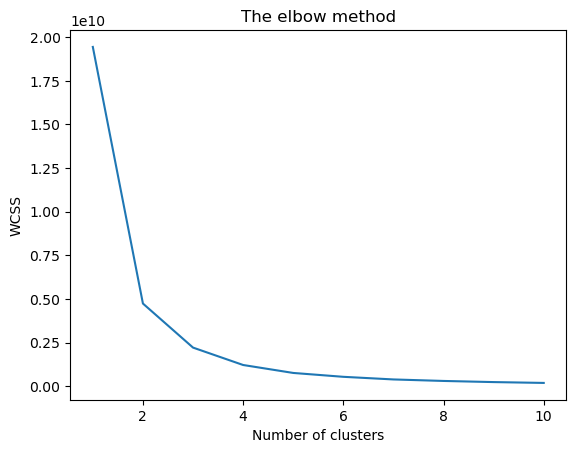

In [120]:
# Finding the optimum number of clusters for k-means classification
from sklearn.cluster import KMeans
wcss = []                  # Declare an array

# Set the loop from the minimum and maximum values
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
    print(kmeans.inertia_)
# inertia_float: Sum of squared distances of samples to their closest cluster center.

# Plotting the results onto a line graph, allowing us to observe 'The elbow'
plt.plot(range(1, 11), wcss)
plt.title('The elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')    # within cluster sum of squares
plt.show()